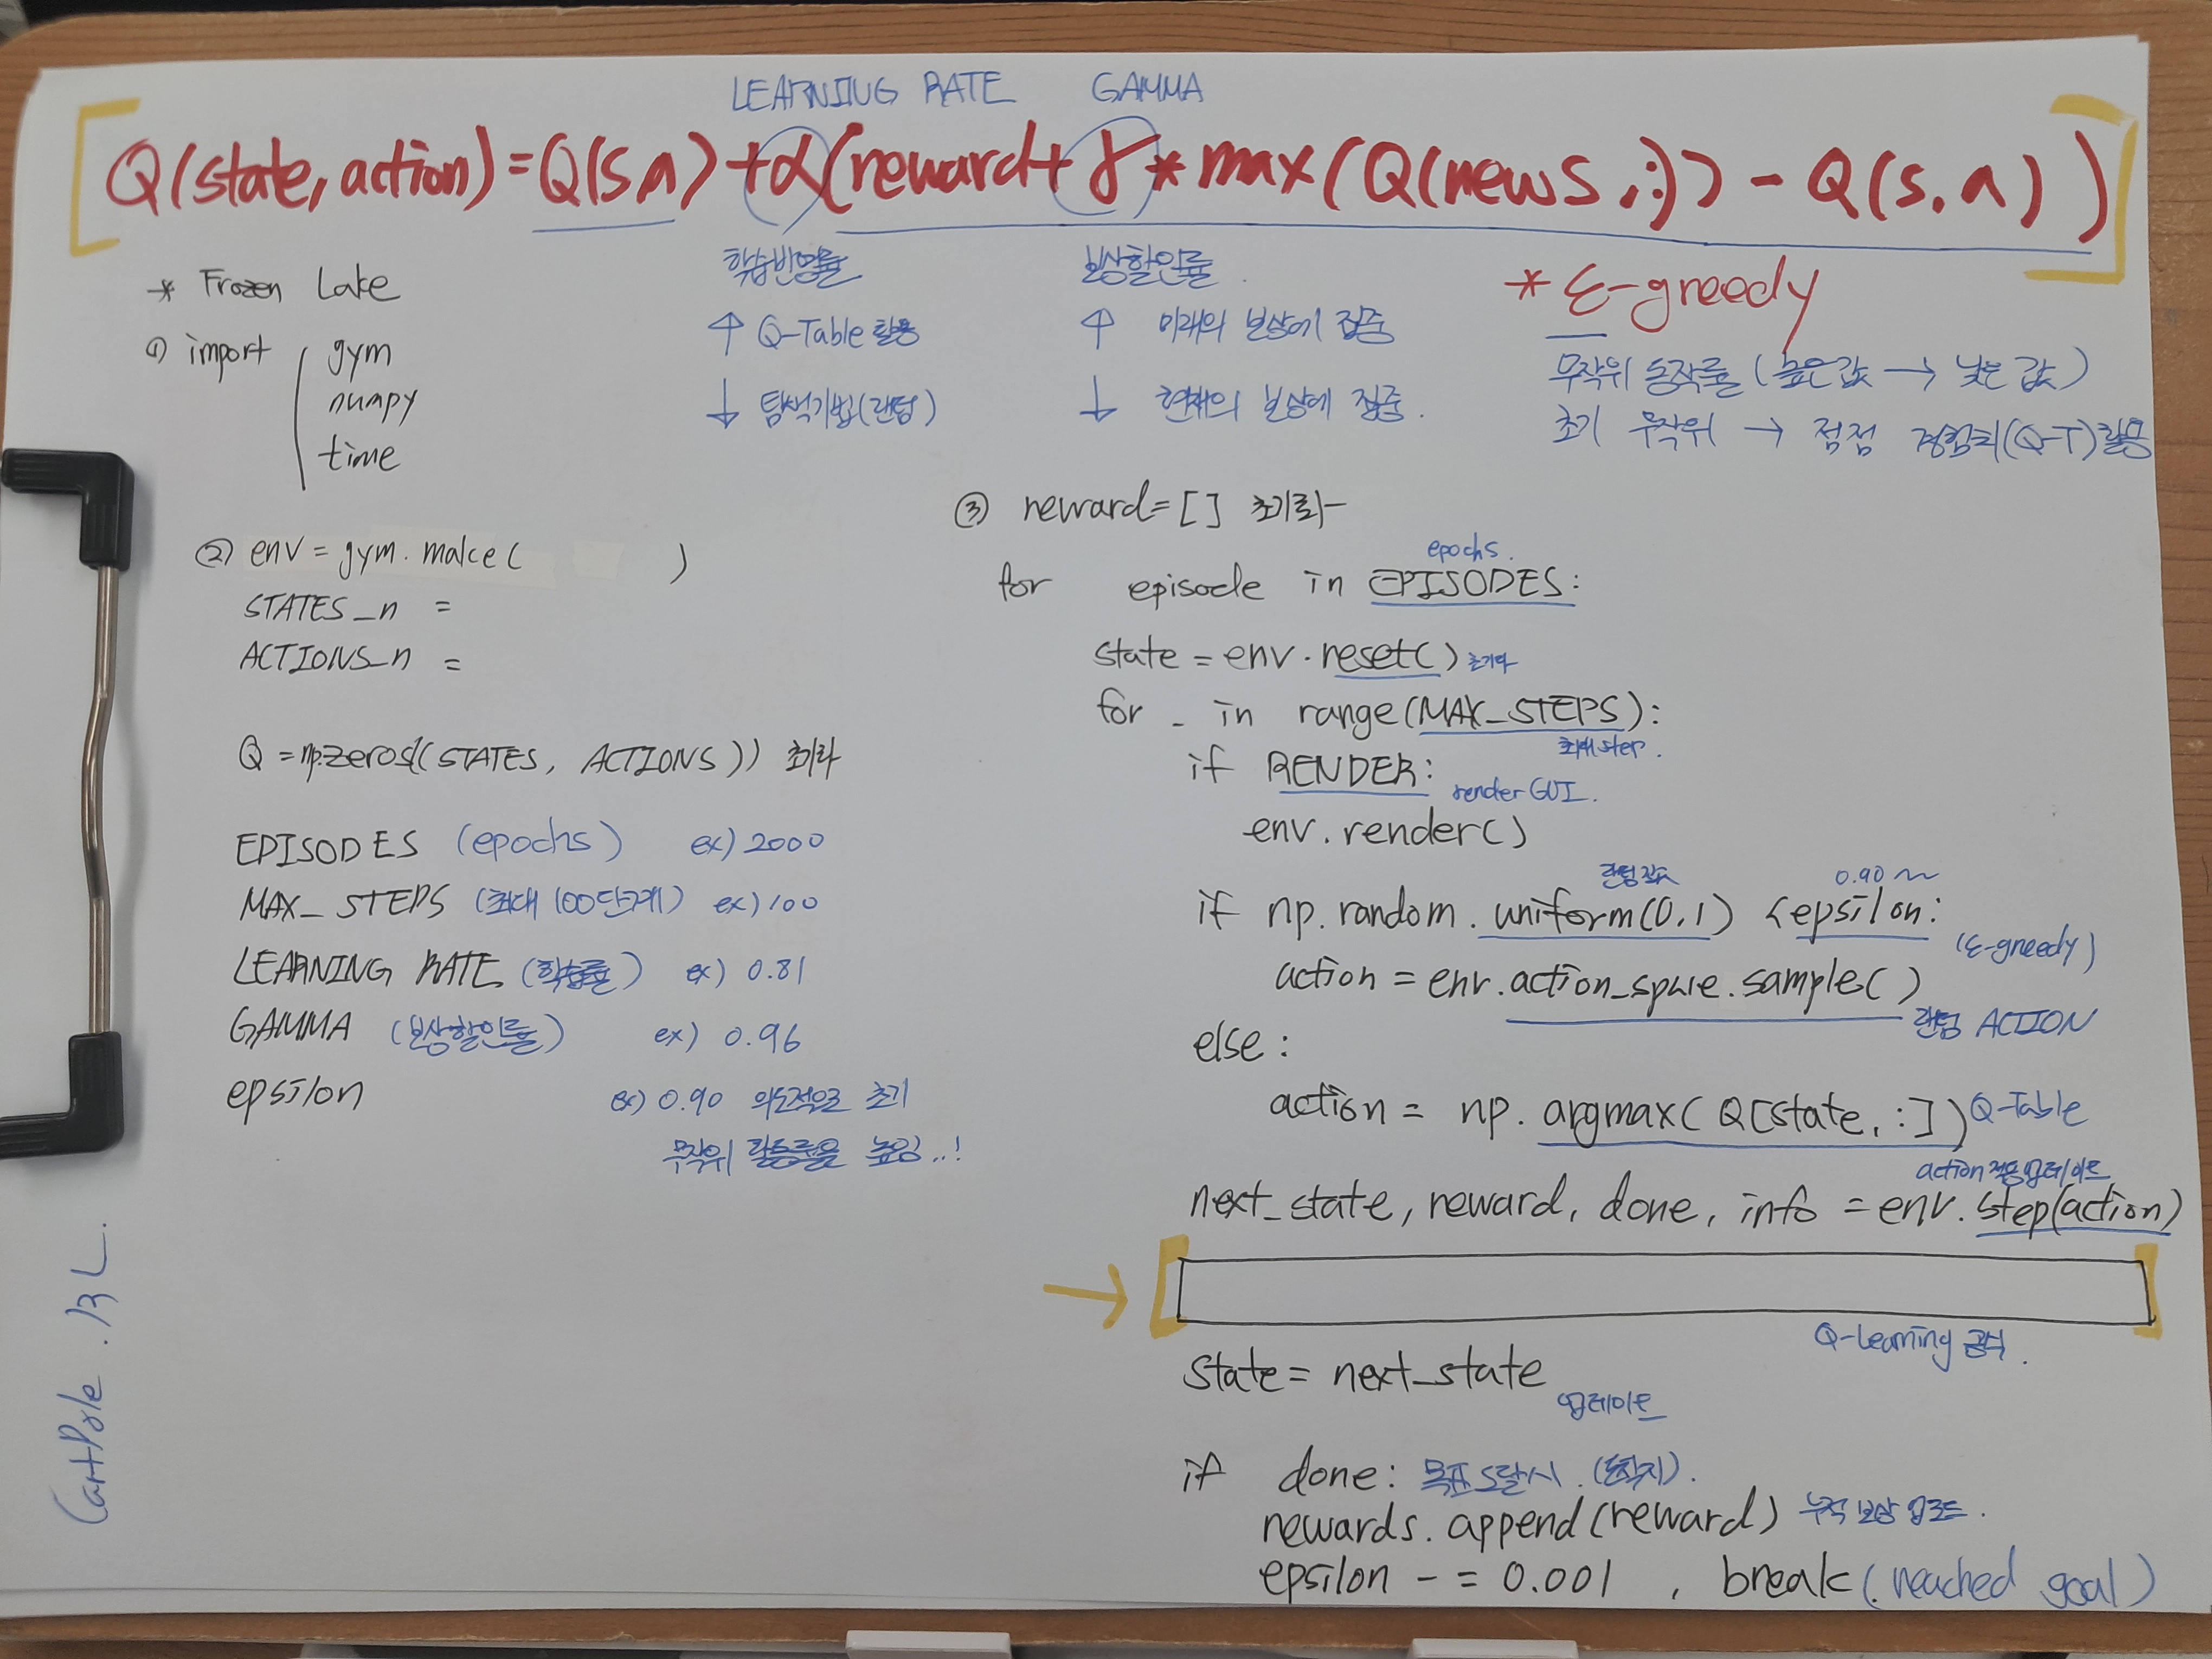

In [ ]:
# DeprecationWarning 걸러내기
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n
Q = np.zeros((STATES,ACTIONS))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
EPISODES = 2000
MAX_STEPS = 100
LEARNING_RATE = 0.81
GAMMA = 0.96
RENDER = False
epsilon = 0.9

In [ ]:
rewards = []
for episode in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS):

    if False:
      env.render()

    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state,:])

    next_state, reward, done, _ = env.step(action)
    Q[state, action] = Q[state, action] + LEARNING_RATE*(reward+GAMMA*np.max(Q[next_state,:])-Q[state,action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

[[2.86370457e-01 2.75778889e-02 2.46109540e-02 2.42109202e-02]
 [2.74853948e-03 9.10453778e-03 1.96718966e-03 3.01561054e-01]
 [6.66831123e-03 5.68443918e-03 1.02362455e-02 3.09344439e-01]
 [3.33468370e-03 5.31454895e-03 2.61469816e-03 1.25023000e-01]
 [3.67637660e-01 1.33942623e-02 1.15419163e-02 1.26504504e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.40354709e-01 6.91587588e-05 5.52152660e-05 7.65632380e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.89301432e-02 1.91977249e-02 7.97965261e-03 4.76934150e-01]
 [3.73530334e-03 7.56929058e-01 4.29943626e-03 9.88192253e-03]
 [6.66645479e-01 1.28892932e-03 9.12642561e-04 7.26138277e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.81898077e-02 5.01813207e-03 9.00134442e-01 2.53473340e-02]
 [1.13158092e-01 9.76668534e-01 1.75427656e-01 1.09082192e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

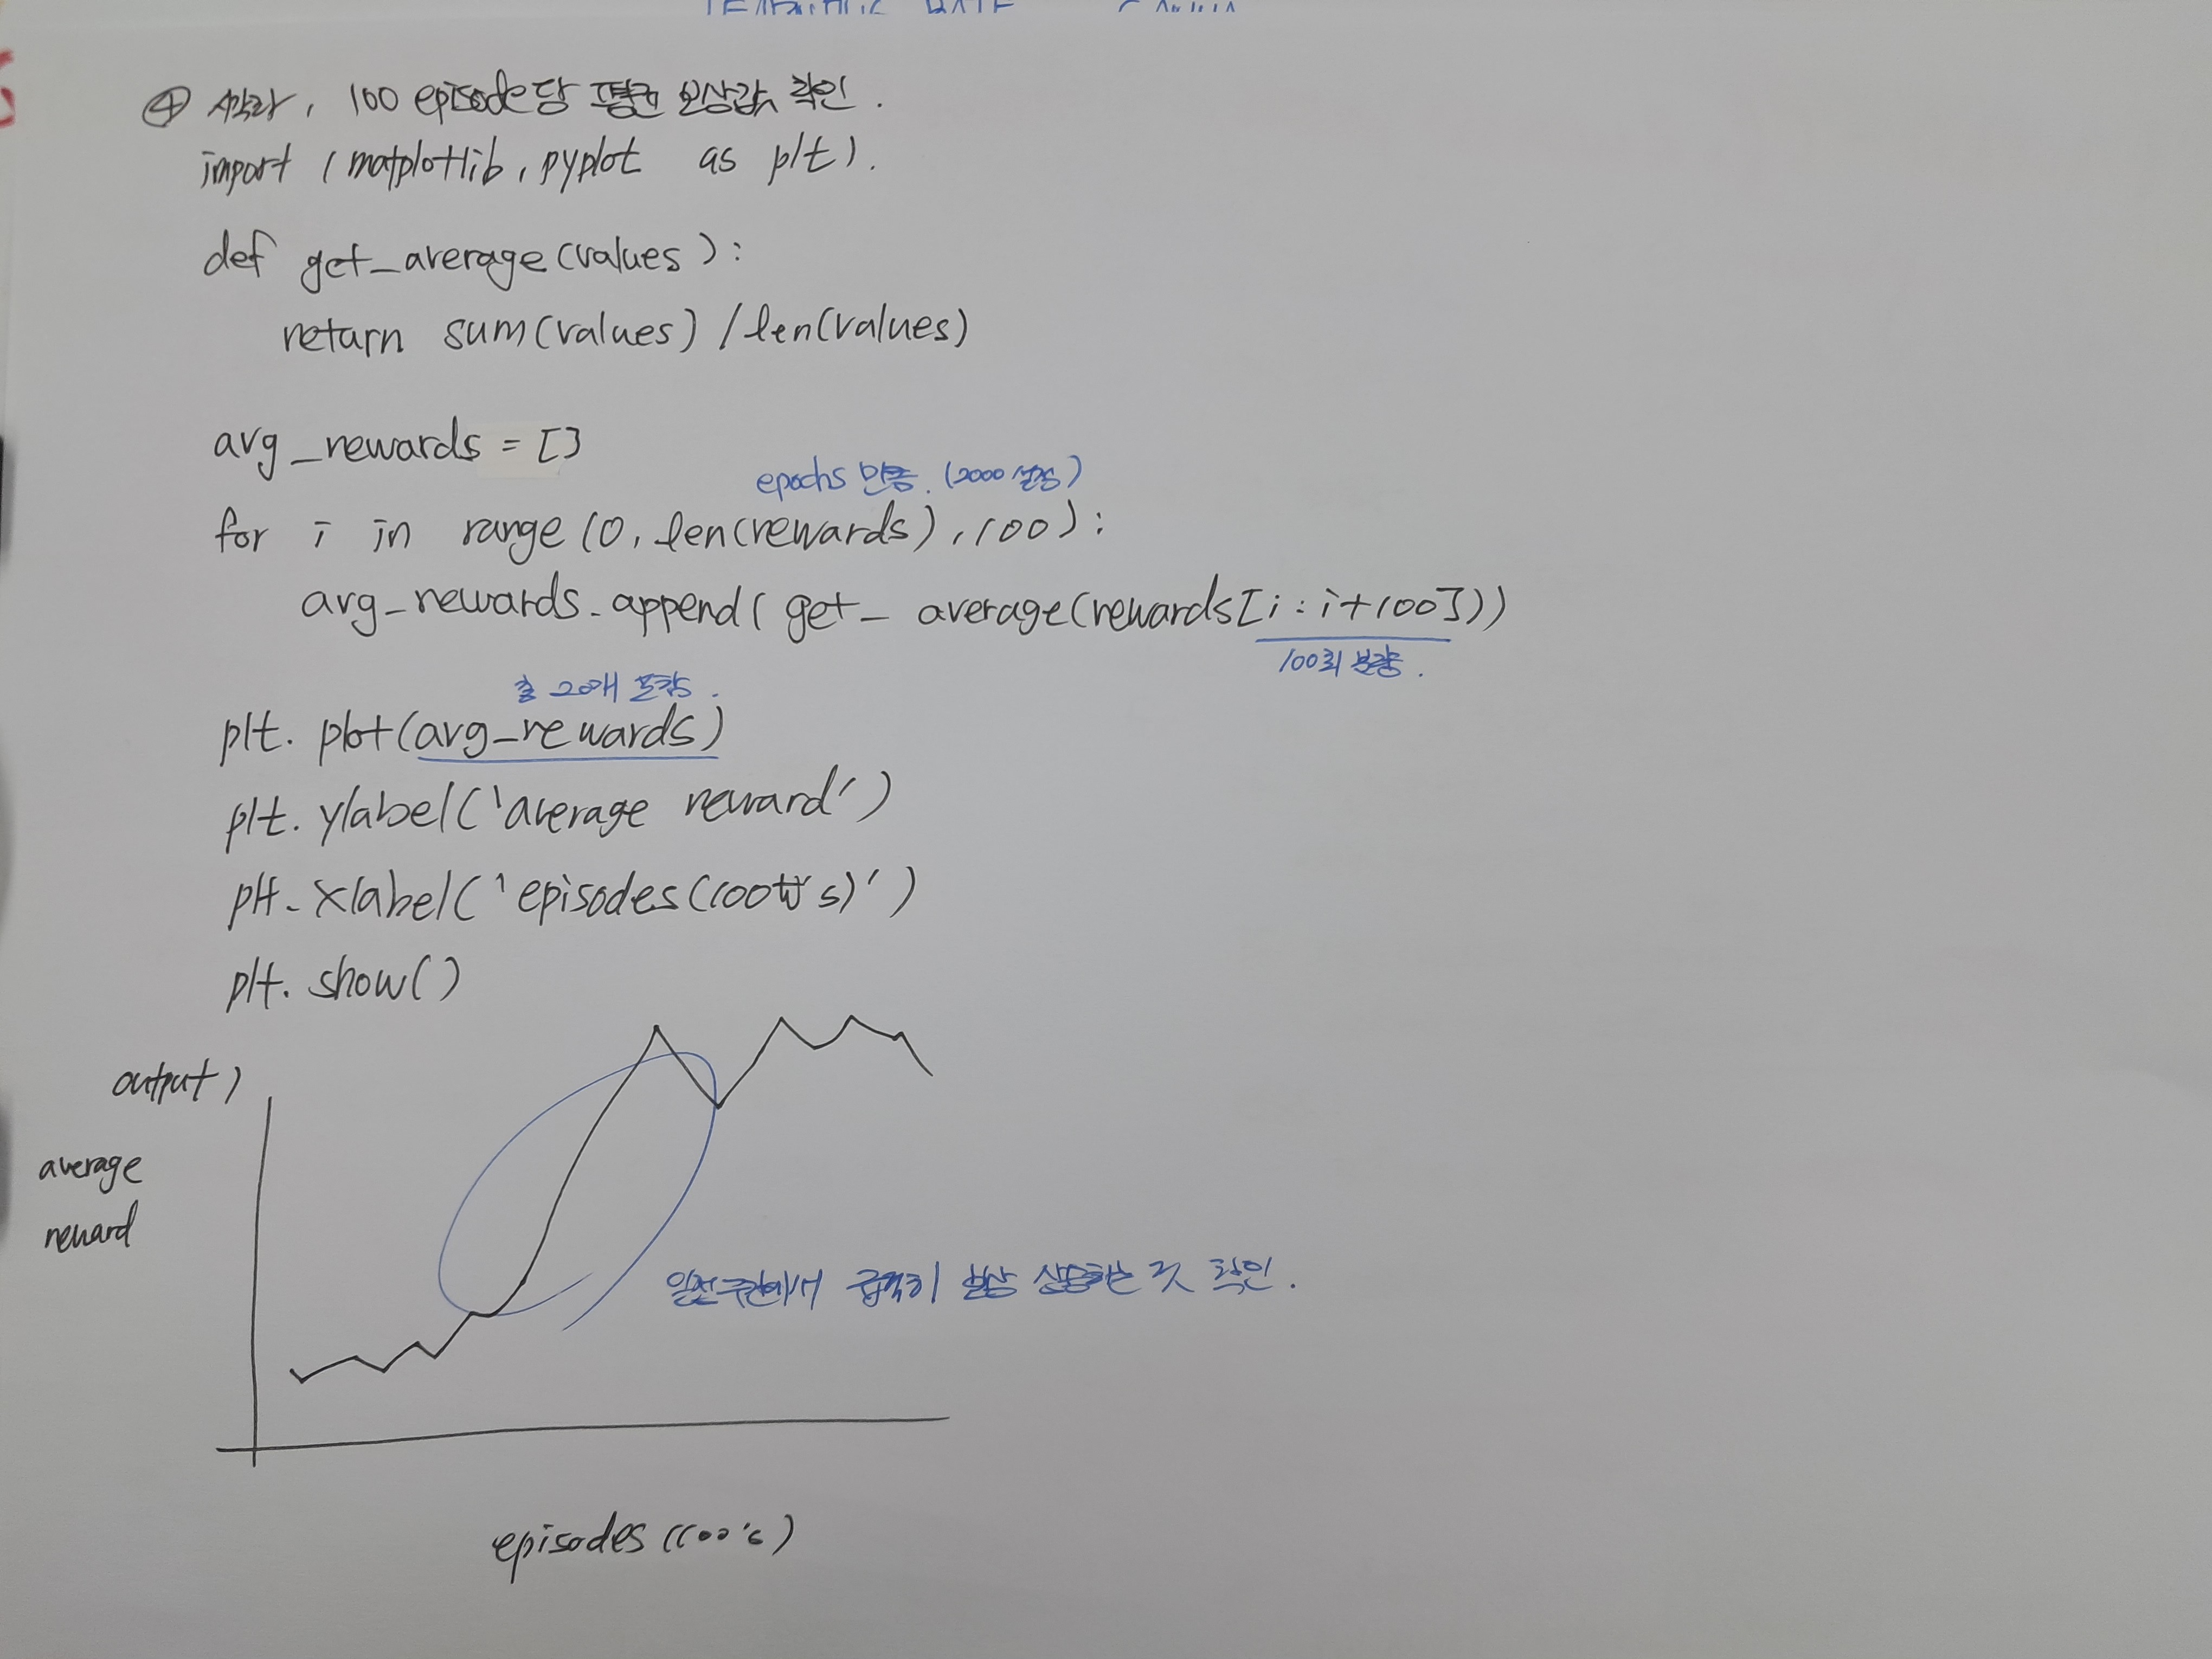

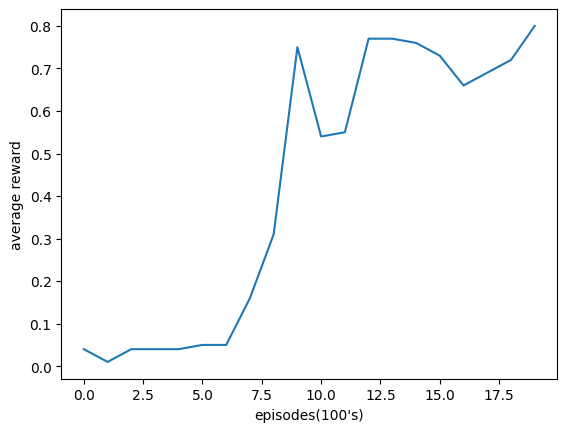

In [ ]:
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0,len(rewards),100):
  avg_rewards.append(get_average(rewards[i:100+i]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes(100\'s)')
plt.show()